In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('bigdatamart_train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# check unique values in dataset without nan values
df.nunique() 

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [6]:
# check unique values in dataset with nan values
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [8]:
# check for null values........though its clear that 2 column contains null values we just need count
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# filling the missing values

from sklearn.impute import SimpleImputer

imp1 = SimpleImputer(strategy='mean')
df['Item_Weight']=imp1.fit_transform(df['Item_Weight'].values.reshape(-1,1))

imp2 = SimpleImputer(strategy='most_frequent')
df['Outlet_Size']=imp2.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [10]:
# checking again tha null values

df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [13]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [14]:
sum(df['Item_Visibility']==0)

526

In [15]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [16]:
sum(df['Item_Visibility']==0)

0

In [17]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [19]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [20]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

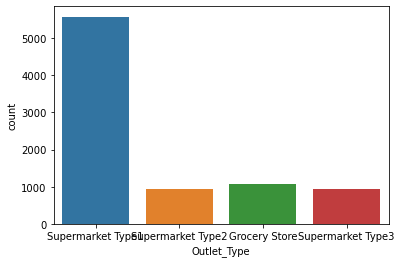

In [21]:

sns.countplot(df['Outlet_Type'])

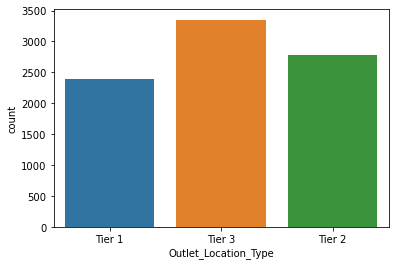

In [22]:
sns.countplot(df['Outlet_Location_Type'])

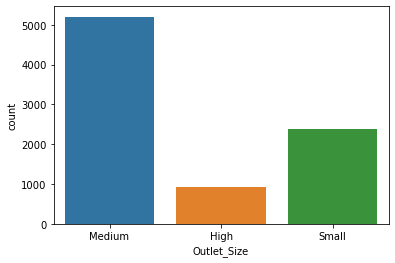

In [23]:
sns.countplot(df['Outlet_Size'])

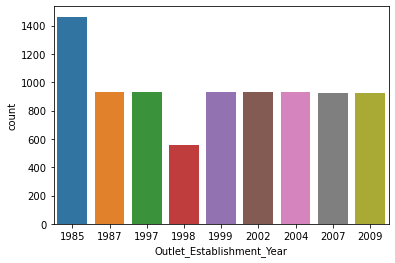

In [24]:
sns.countplot(df['Outlet_Establishment_Year'])

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

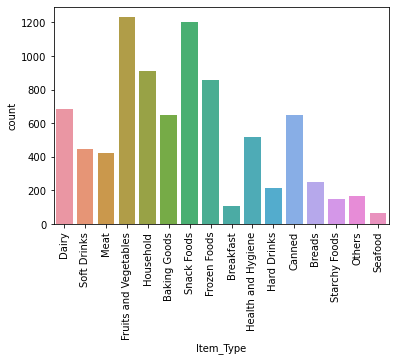

In [25]:
l = list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

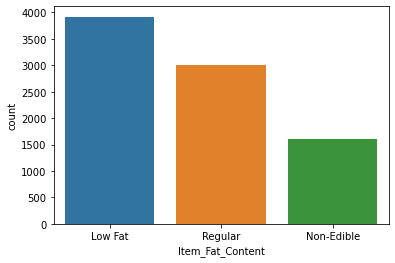

In [26]:
sns.countplot(df["Item_Fat_Content"])

In [27]:
# dropping unnecessary columns

df.drop('Item_Identifier',axis=1,inplace=True)
df.drop('Outlet_Identifier',axis=1,inplace=True)
df.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [28]:
# encoding all to numeric values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

Item_Weight                AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Item_Fat_Content        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Item_Visibility         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Item_Type               AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Item_MRP                AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Outlet_Size             AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Outlet_Location_Type    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Outlet_Type                   AxesSubplot(0.125,0.125;0.0945122x0.343182)
Item_Outlet_Sales          AxesSubplot(0.238415,0.125;0.0945122x0.343182)
New_Item_Type              AxesSubplot(0.351829,0.125;0.0945122x0.343182)
dtype: object

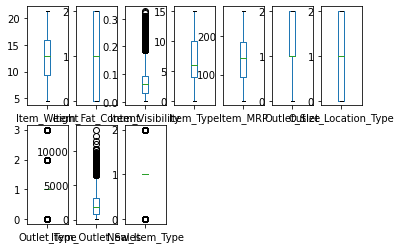

In [29]:
df.plot.box(subplots=True,layout=(2,7))

In [30]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(8523, 10)
(8334, 10)


In [31]:
df=df_new
df.shape

(8334, 10)

In [32]:
df.skew()

Item_Weight             0.089363
Item_Fat_Content        0.210399
Item_Visibility         0.864331
Item_Type               0.098136
Item_MRP                0.138877
Outlet_Size            -0.087810
Outlet_Location_Type   -0.202747
Outlet_Type             0.957677
Item_Outlet_Sales       0.877845
New_Item_Type           0.111713
dtype: float64

In [33]:
# treating skewness using log

for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [34]:
df.skew()

Item_Weight             0.089363
Item_Fat_Content        0.210399
Item_Visibility         0.782318
Item_Type               0.098136
Item_MRP                0.138877
Outlet_Size            -0.087810
Outlet_Location_Type   -0.202747
Outlet_Type            -0.238219
Item_Outlet_Sales      -0.937152
New_Item_Type           0.111713
dtype: float64

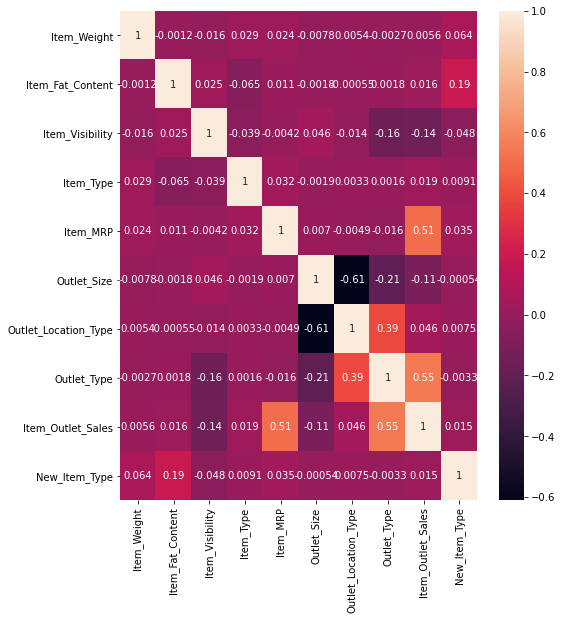

In [35]:
# heatmap
import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [36]:
#splitting the data for training and test

x=df.drop(columns=['Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

In [37]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-0.83694643, -0.99929871, -1.20190359, ..., -1.37058866,
        -0.10239749, -0.18236893],
       [-1.63171704,  1.23794923, -1.12412265, ...,  1.09913802,
         1.0482334 , -2.09174414],
       [ 1.09119527, -0.99929871, -1.18472305, ..., -1.37058866,
        -0.10239749, -0.18236893],
       ...,
       [-0.53126543,  0.11932526, -0.74471305, ..., -0.13572532,
        -0.10239749,  1.72700628],
       [-1.32838743,  1.23794923,  1.73009262, ...,  1.09913802,
         1.0482334 , -0.18236893],
       [ 0.45631935, -0.99929871, -0.51640495, ..., -1.37058866,
        -0.10239749, -2.09174414]])

In [38]:
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    if r2_scr>max_score:
        max_score=r2_scr
        final_r_state=r_state
print("Maximimum r2 Score is",max_score,'at',final_r_state)

Maximimum r2 Score is 0.6524096549523739 at 69


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=69)

In [40]:
from sklearn.linear_model import Lasso,Ridge

ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predls=ls.predict(x_test)
print("R2 Score is: ",r2_score(y_test,predls))

R2 Score is:  0.6523884241622029


In [42]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
predrd=rd.predict(x_test)
print("R2 Score is: ",r2_score(y_test,predrd))

R2 Score is:  0.6524096532945244


In [43]:
from sklearn.linear_model import ElasticNet

enr=ElasticNet(alpha=.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print("R2 Score is: ",r2_score(y_test,enrpred))

R2 Score is:  0.6523936730023612


In [44]:
# testing other models too


from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


model=[SVR(),SVR(kernel='linear'),SVR(kernel='poly'),DecisionTreeRegressor()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("R2 Score of",m,'is:')
    print(r2_score(y_test,predm))
    print("RSME is: ",np.sqrt(mean_squared_error(y_test,predm)))
    print('\n') 

R2 Score of SVR() is:
0.7273907692187359
RSME is:  0.5342083818489453


R2 Score of SVR(kernel='linear') is:
0.6478413512842838
RSME is:  0.6071690122877267


R2 Score of SVR(kernel='poly') is:
0.697037628876485
RSME is:  0.5631638442146047


R2 Score of DecisionTreeRegressor() is:
0.48229150413242416
RSME is:  0.7361783906503755




In [45]:
# applying some ensemble techniques too

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

model=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("R2 Score of",m,'is:')
    print(r2_score(y_test,predm))
    print("RSME is: ",np.sqrt(mean_squared_error(y_test,predm)))
    print('\n') 


R2 Score of RandomForestRegressor() is:
0.7072032537550346
RSME is:  0.5536350058499978


R2 Score of AdaBoostRegressor() is:
0.6892614372001846
RSME is:  0.5703454688644222


R2 Score of GradientBoostingRegressor() is:
0.7399259410410508
RSME is:  0.5217818126012143




In [46]:
# as we saw max r2 score is at gradient boost technique

from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
print("R2 Score is: ",r2_score(y_test,predgbr))
print("RSME is: ",np.sqrt(mean_squared_error(y_test,predgbr)))

R2 Score is:  0.7399118523266793
RSME is:  0.5217959453743874


In [47]:
# cross validation
from sklearn.model_selection import cross_val_score

gbrscores=cross_val_score(gbr,x,y,cv=5)
print(gbrscores)
print(gbrscores.mean(),gbrscores.std())

[0.71762908 0.71463347 0.72039869 0.7173769  0.74544313]
0.7230962548093369 0.011321477050361767


In [48]:
# saving the best model 

import joblib
joblib.dump(gbr,'gbrfile_Bigdatamart_project.obj')

['gbrfile_Bigdatamart_project.obj']